# I. Import Libraries, Preferences, & Helper Functions

## Libraries

In [1]:
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preferences

In [2]:
# Warnings
warnings.filterwarnings("ignore")

# Adjust display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  

## Helpers

### Functions

#### Handling Missing Values

In [3]:
def missing_values_handler(data, numerical, categorical):
    for col in numerical:
        if col == 'LotFrontage':
            data[col] = data.groupby('Neighborhood')[col].transform(lambda x: x.fillna(x.median()))
        elif col == 'MasVnrArea':
            data[col].fillna(0, inplace=True)
        elif col == 'GarageYrBlt':
            # Create a condition to check if 'GarageCars' and 'GarageArea' are not 0
            condition = (data['GarageCars'] != 0) & (data['GarageArea'] != 0)
            # Apply the fillna operation only where the condition is met
            data.loc[condition, col] = data.loc[condition, col].fillna(data['YearBuilt'])
            # Set GarageYrBlt to NaN where GarageCars and GarageArea are 0
            data.loc[~condition, col] = 0

    for col in categorical:
        # Fill missing values with 'None' for categorical columns
        data[col].fillna('None', inplace=True)

    return data

### Mapping

#### Neighborhoods

In [4]:
neighborhood_mapping = {
    'Blmngtn': 'Bloomington Heights',
    'Blueste': 'Bluestem',
    'BrDale': 'Briardale',
    'BrkSide': 'Brookside',
    'ClearCr': 'Clear Creek',
    'CollgCr': 'College Creek',
    'Crawfor': 'Crawford',
    'Edwards': 'Edwards',
    'Gilbert': 'Gilbert',
    'IDOTRR': 'Iowa DOT and Rail Road',
    'MeadowV': 'Meadow Village',
    'Mitchel': 'Mitchell',
    'Names': 'North Ames',
    'NoRidge': 'Northridge',
    'NPkVill': 'Northpark Villa',
    'NridgHt': 'Northridge Heights',
    'NWAmes': 'Northwest Ames',
    'OldTown': 'Old Town',
    'SWISU': 'South & West of Iowa State University',
    'Sawyer': 'Sawyer',
    'SawyerW': 'Sawyer West',
    'Somerst': 'Somerset',
    'StoneBr': 'Stone Brook',
    'Timber': 'Timberland',
    'Veenker': 'Veenker'
}

# II. Exploratory Data Analysis

## Load & Preview the Data

In [5]:
DATASETURL = "https://gitlab.com/aelluminate/databank/2024-10/ames-city-real-estate/-/raw/main/train.csv"

data = pd.read_csv(DATASETURL)
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Preview both Numeric & Categorical Data

In [7]:
numerical_features = data.select_dtypes(include=[np.number])
categorical_features = data.select_dtypes(exclude=[np.number])

print(f"Numerical features\n{numerical_features.columns}\nTotal: {len(numerical_features.columns)}\n")
print(f"Categorical features\n{categorical_features.columns}\nTotal: {len(categorical_features.columns)}")

Numerical features
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Total: 38

Categorical features
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 

## Check for Missing Values

In [8]:
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
print(f"Features with missing values\n{data.columns[data.isnull().any()]}\nTotal: {len(data.columns[data.isnull().any()])}")

# Missing features, if they are numerical or categorical
missing_features = data.columns[data.isnull().any()]
missing_numerical_features = data[missing_features].select_dtypes(include=[np.number])
missing_categorical_features = data[missing_features].select_dtypes(exclude=[np.number])

Features with missing values
Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')
Total: 19


As we notice, training dataset has plenty of missing values.

# III. Data Preprocessing

## Indicator Variable(s) for Missing Values

Creating indicator variables (also known as dummy variables or binary flags) involves generating a new variable that marks the presence or absence of missing data in your original features.

In [10]:
# Identify features with missing values
missing_features = data.columns[data.isnull().any()]

# Separate features into numerical and categorical
numerical_mf = [feature for feature in missing_features if np.issubdtype(data[feature].dtype, np.number)]
categorical_mf = [feature for feature in missing_features if not np.issubdtype(data[feature].dtype, np.number)]

# Preview features with their types
print(f"Numerical features with missing values\n{numerical_mf}\n")
print(f"Categorical features with missing values\n{categorical_mf}")

Numerical features with missing values
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

Categorical features with missing values
['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [11]:
data = missing_values_handler(data, numerical_mf, categorical_mf)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


### Verify the Preprocessed Data

Verify if the handling of missing values was successful.

In [12]:
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

# IV. Visualizing the Data

## Correlation of Numeric Features

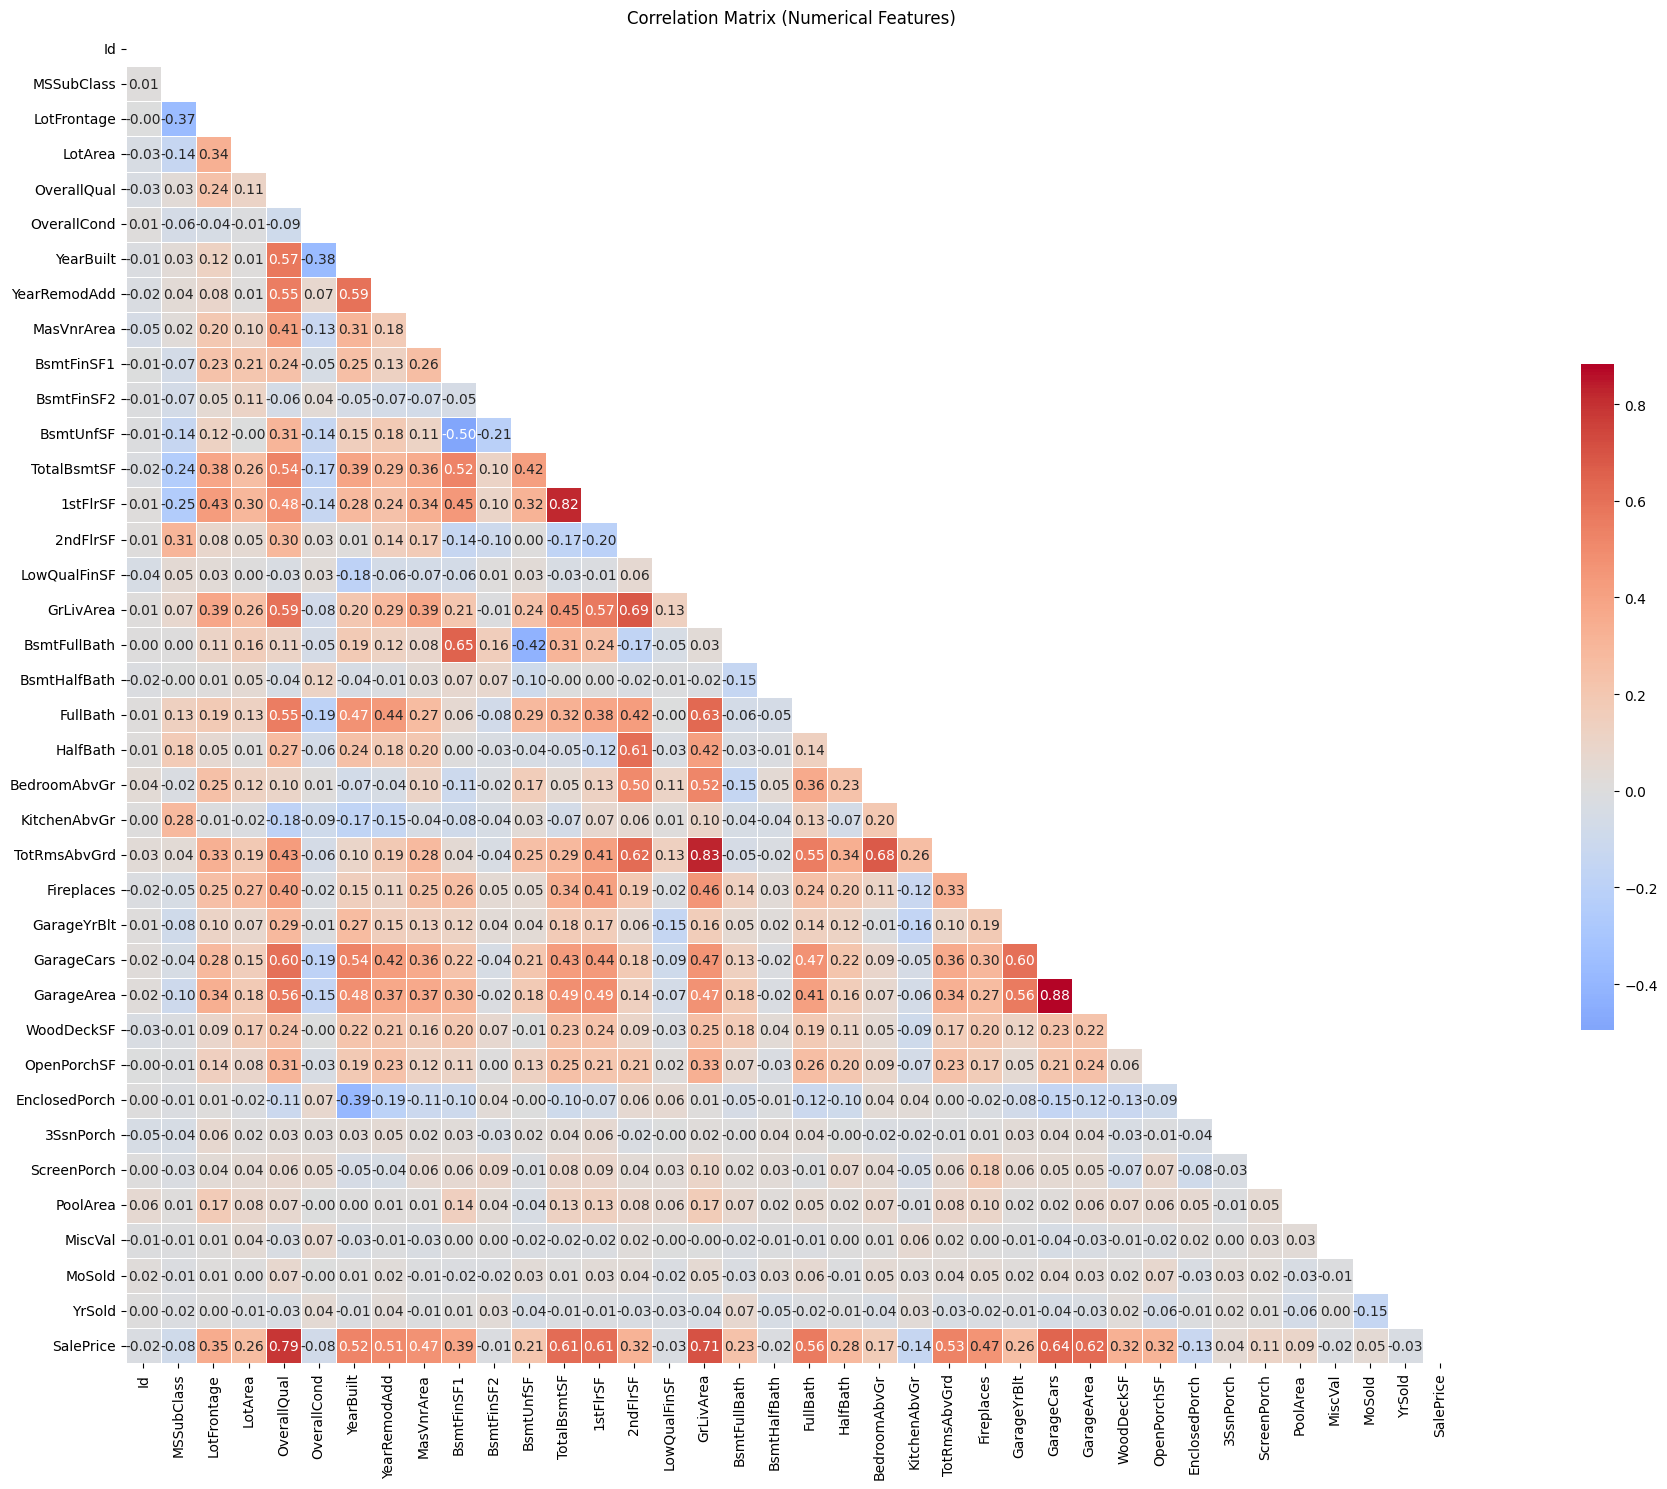

In [13]:
numerical_feature = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numerical_feature.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0, annot=True, fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix (Numerical Features)")
plt.tight_layout()

# Display the plot
plt.show()

In [14]:
corr_target = corr['SalePrice'].sort_values(ascending=False)
print(f"Correlation of numerical features with the target\n{corr_target}")

Correlation of numerical features with the target
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.349876
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch 

## House Age vs. Sale Price

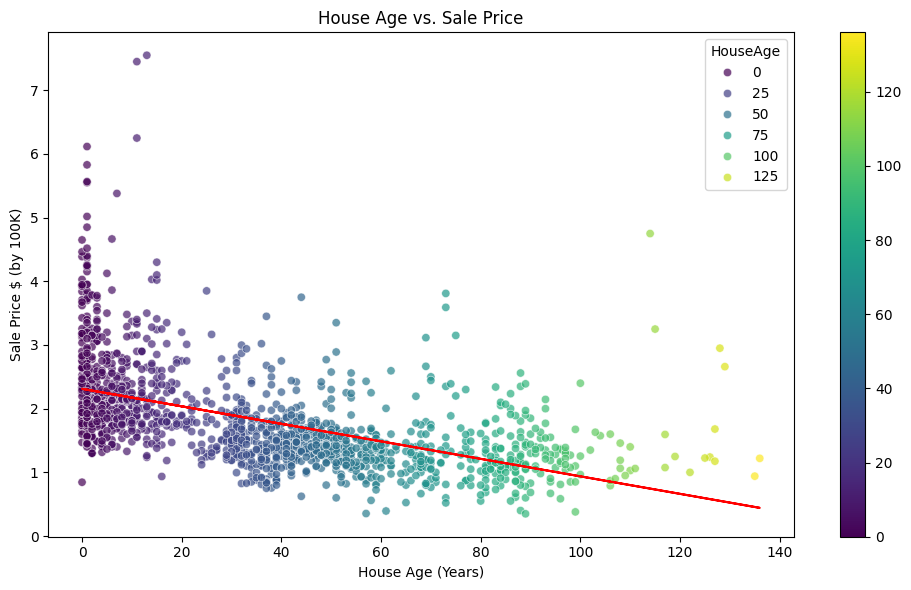

In [15]:
# Calculate the house age
data['HouseAge'] = data['YrSold'] - data['YearBuilt']

# Scale the SalePrice values
data['SalePriceScaled'] = data['SalePrice'] / 100000

# Plot the distribution of the house age vs the sale price
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='HouseAge', y='SalePriceScaled', data=data, alpha=0.7, hue='HouseAge', palette='viridis')

# Add a color bar
norm = plt.Normalize(data['HouseAge'].min(), data['HouseAge'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=scatter.axes)

# House Age trend line
trend = np.polyfit(data['HouseAge'], data['SalePriceScaled'], 1)
plt.plot(data['HouseAge'], trend[0] * data['HouseAge'] + trend[1], color='red')

# Set the title and labels
plt.title("House Age vs. Sale Price")
plt.xlabel("House Age (Years)")
plt.ylabel("Sale Price $ (by 100K)")
plt.tight_layout()

# Display the plot
plt.show()

## Remodel Age vs. Sale Price

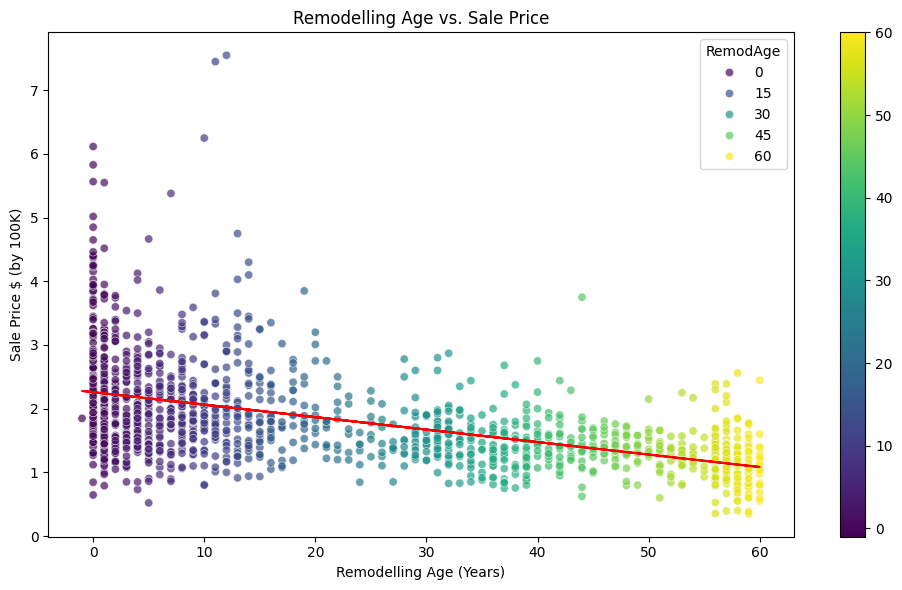

In [16]:
data['RemodAge'] = data['YrSold'] - data['YearRemodAdd']

# Scale the SalePrice values
data['SalePriceScaled'] = data['SalePrice'] / 100000

# Plot the distribution of the remodelling age vs the sale price
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='RemodAge', y='SalePriceScaled', data=data, alpha=0.7, hue='RemodAge', palette='viridis')

# Add a color bar
norm = plt.Normalize(data['RemodAge'].min(), data['RemodAge'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=scatter.axes)

# House Age trend line
trend = np.polyfit(data['RemodAge'], data['SalePriceScaled'], 1)
plt.plot(data['RemodAge'], trend[0] * data['RemodAge'] + trend[1], color='red')

# Set the title and labels
plt.title("Remodelling Age vs. Sale Price")
plt.xlabel("Remodelling Age (Years)")
plt.ylabel("Sale Price $ (by 100K)")
plt.tight_layout()

# Display the plot
plt.show()


## House Age Distribution

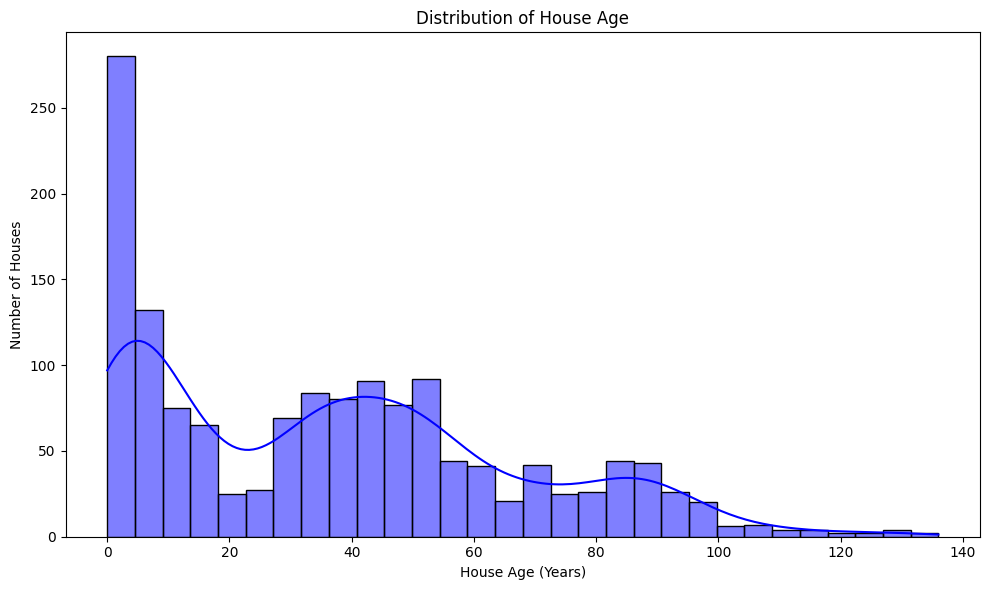

In [17]:
data['HouseAge'] = data['YrSold'] - data['YearBuilt']

# Plot the distribution of the new features
plt.figure(figsize=(10, 6))
sns.histplot(data['HouseAge'], kde=True, color='blue', bins=30)
plt.title("Distribution of House Age")
plt.xlabel("House Age (Years)")
plt.ylabel("Number of Houses")
plt.tight_layout()

# Display the plot
plt.show()


## Remodeling Age Distribution

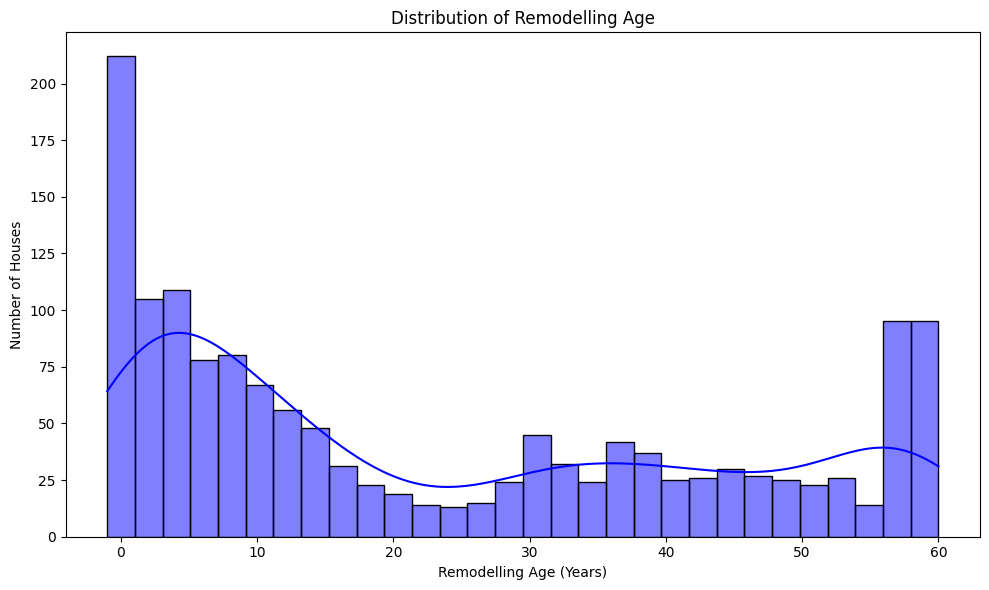

In [18]:
data['RemodAge'] = data['YrSold'] - data['YearRemodAdd']

# Plot the distribution of the new features
plt.figure(figsize=(10, 6))
sns.histplot(data['RemodAge'], kde=True, color='blue', bins=30)
plt.title("Distribution of Remodelling Age")
plt.xlabel("Remodelling Age (Years)")
plt.ylabel("Number of Houses")
plt.tight_layout()

# Display the plot
plt.show()

## House with our without Pool Distribution

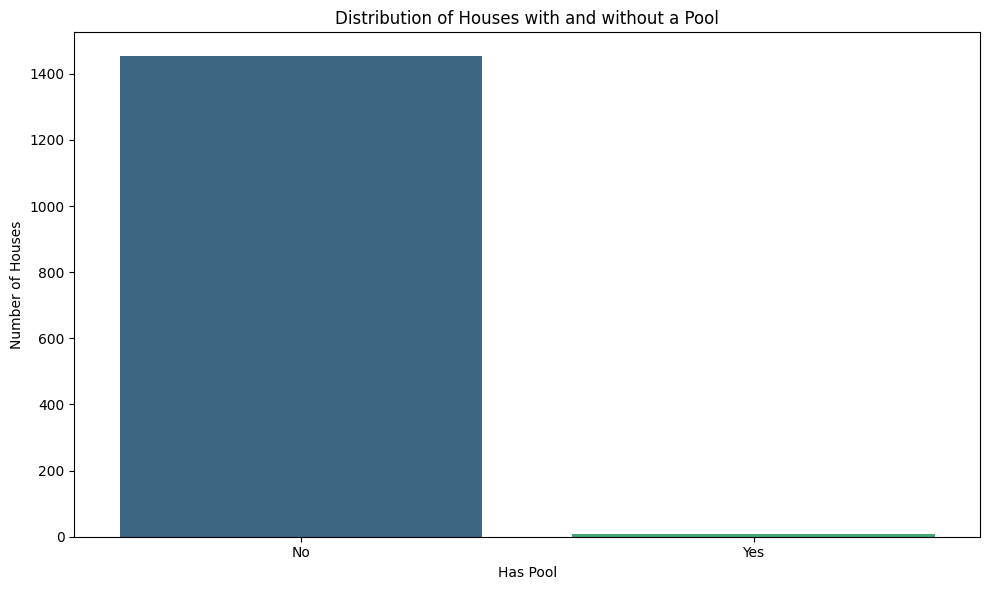

In [19]:
# Create a new column to indicate if a house has a pool
data['HasPool'] = data['PoolArea'] > 0

# Calculate the count of houses with and without a pool
pool_count = data['HasPool'].value_counts()

# Plot the count of houses with and without a pool
plt.figure(figsize=(10, 6))
sns.barplot(x=pool_count.index, y=pool_count.values, palette='viridis')
plt.title("Distribution of Houses with and without a Pool")
plt.xlabel("Has Pool")
plt.ylabel("Number of Houses")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.tight_layout()

# Display the plot
plt.show()

## House with Pool vs. Sale Price

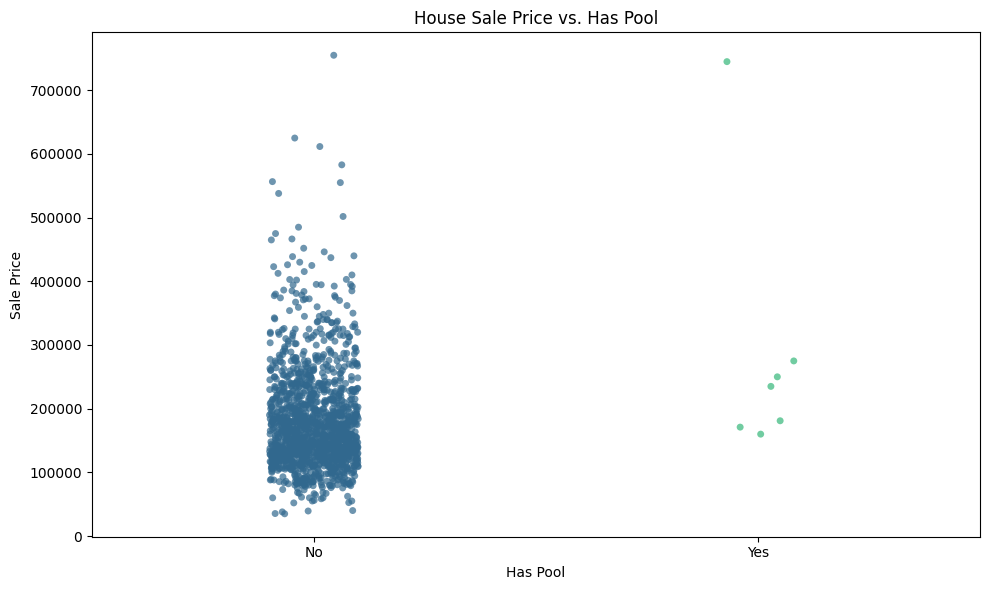

In [20]:
# Plot the sale price vs has pool
plt.figure(figsize=(10, 6))
sns.stripplot(x='HasPool', y='SalePrice', data=data, palette='viridis', alpha=0.7)
plt.title("House Sale Price vs. Has Pool")
plt.xlabel("Has Pool")
plt.ylabel("Sale Price")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.tight_layout()

# Display the plot
plt.show()

## Living Area vs. Sale Price

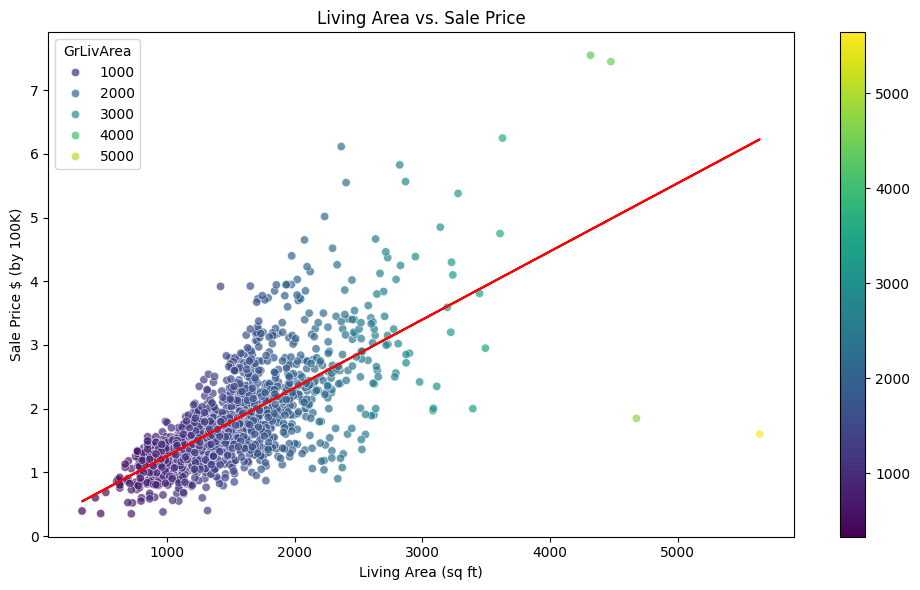

In [21]:
# Scale the SalePrice values
data['SalePriceScaled'] = data['SalePrice'] / 100000

# Plot the living area vs sale price
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='GrLivArea', y='SalePriceScaled', data=data, alpha=0.7, palette='viridis', hue='GrLivArea')

# Add a trend line
trend = np.polyfit(data['GrLivArea'], data['SalePriceScaled'], 1)
plt.plot(data['GrLivArea'], trend[0] * data['GrLivArea'] + trend[1], color='red')

# Add a color bar
norm = plt.Normalize(data['GrLivArea'].min(), data['GrLivArea'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=scatter.axes)

# Set the title and labels
plt.title("Living Area vs. Sale Price")
plt.xlabel("Living Area (sq ft)")
plt.ylabel("Sale Price $ (by 100K)")
plt.tight_layout()

# Display the plot
plt.show()

## Overall Score vs. Sale Price

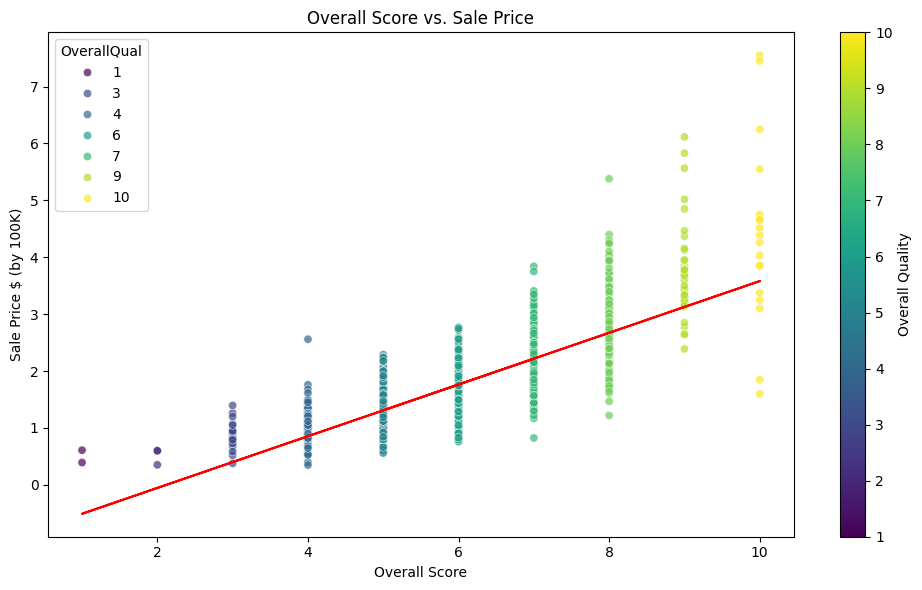

In [22]:
# Scale the SalePrice values
data['SalePriceScaled'] = data['SalePrice'] / 100000

# Plot the overall score vs sale price
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='OverallQual', y='SalePriceScaled', data=data, alpha=0.7, palette='viridis', hue='OverallQual')

# Add a trend line
trend = np.polyfit(data['OverallQual'], data['SalePriceScaled'], 1)
plt.plot(data['OverallQual'], trend[0] * data['OverallQual'] + trend[1], color='red')

# Add a color bar
norm = plt.Normalize(data['OverallQual'].min(), data['OverallQual'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Overall Quality', ax=scatter.axes)

# Set the title and labels
plt.title("Overall Score vs. Sale Price")
plt.xlabel("Overall Score")
plt.ylabel("Sale Price $ (by 100K)")
plt.tight_layout()

# Display the plot
plt.show()

## House Style vs. Sale Price

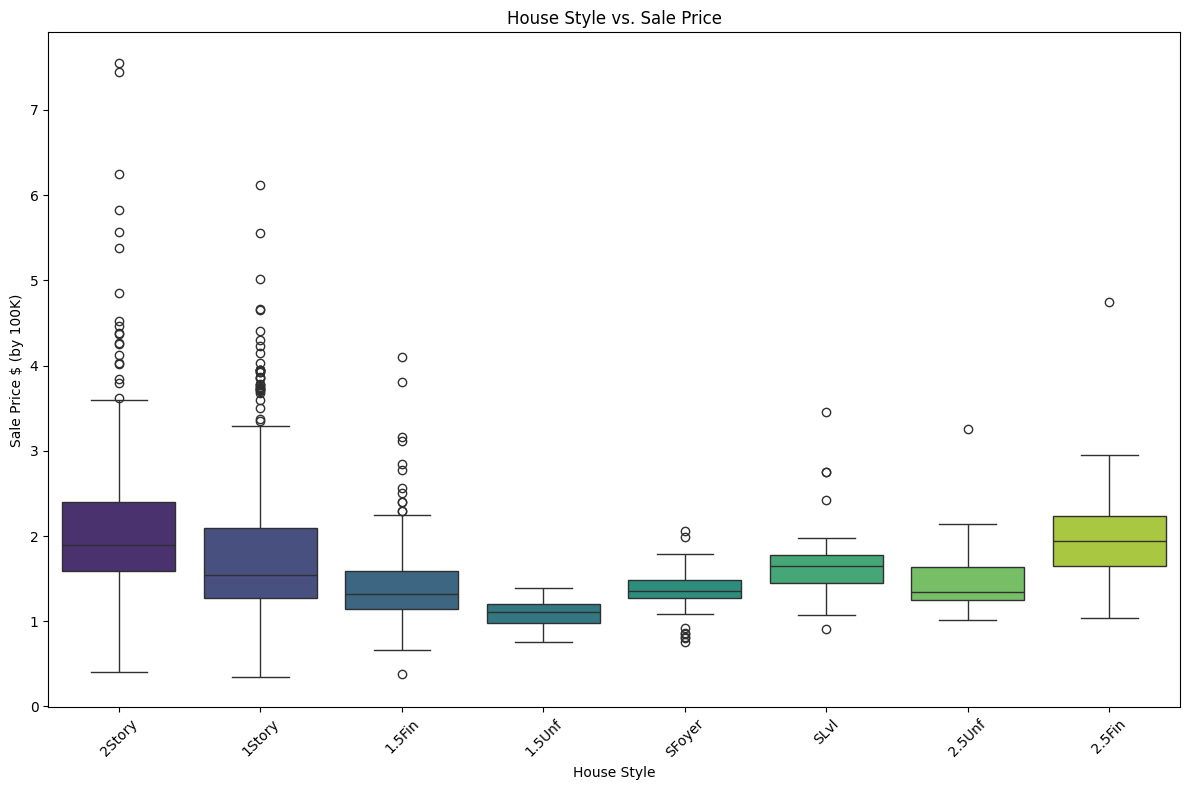

In [23]:
# Scale the SalePrice values
data['SalePriceScaled'] = data['SalePrice'] / 100000

# Plot the house style vs sale price
plt.figure(figsize=(12, 8))
sns.boxplot(x='HouseStyle', y='SalePriceScaled', data=data, palette='viridis')
plt.title("House Style vs. Sale Price")
plt.xlabel("House Style")
plt.ylabel("Sale Price $ (by 100K)")
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

## Neighborhood vs. Sale Price

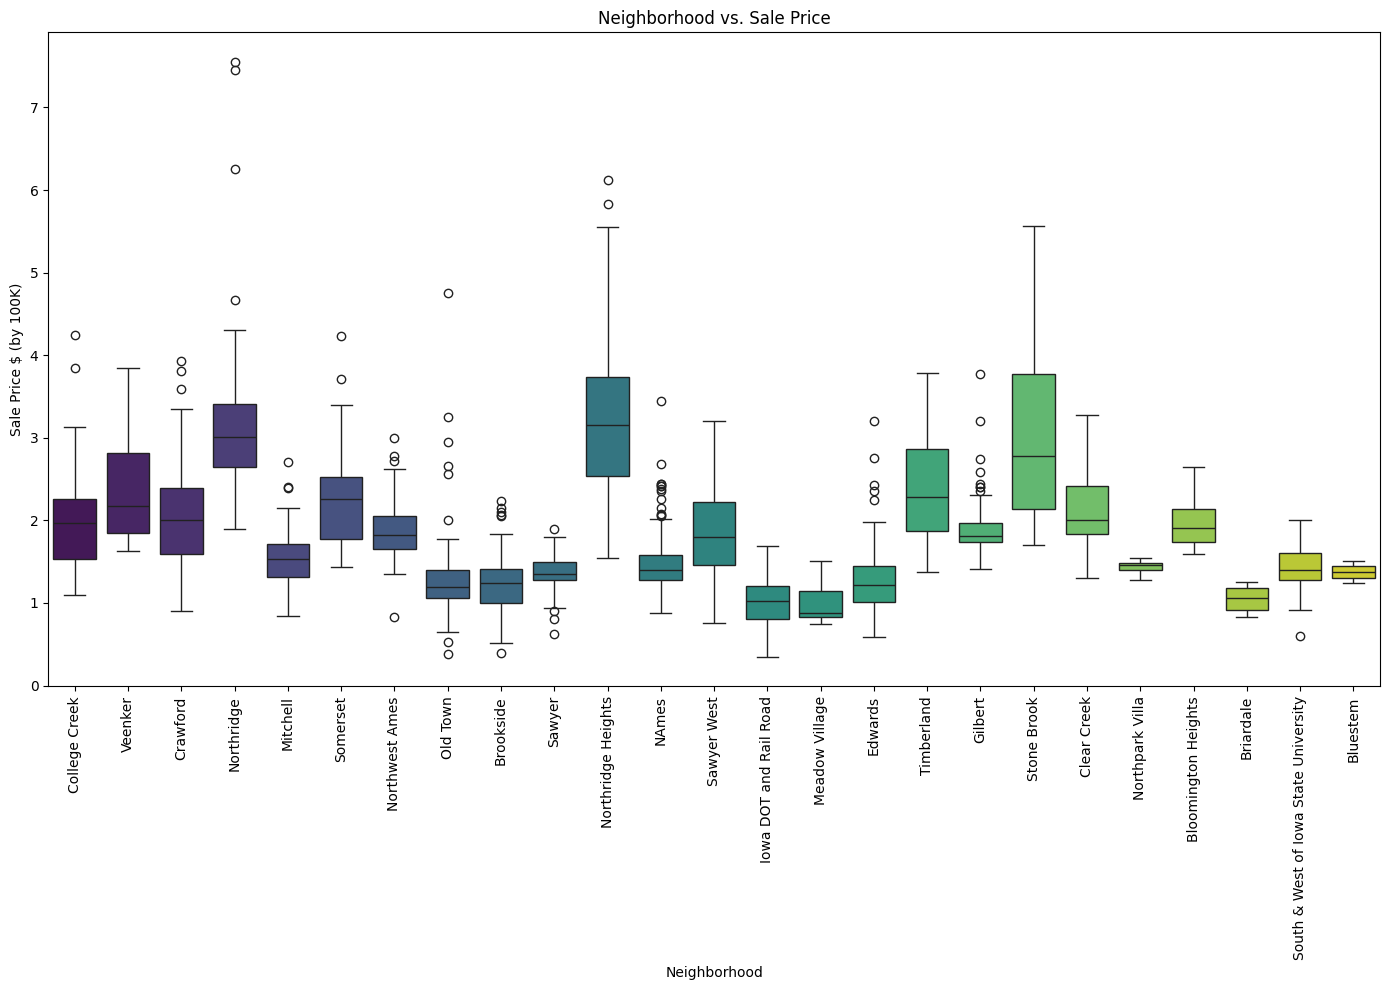

In [24]:
# Create a temporary column with full neighborhood names
data['NeighborhoodFull'] = data['Neighborhood'].replace(neighborhood_mapping)

# Scale the SalePrice values
data['SalePriceScaled'] = data['SalePrice'] / 100000

# Plot the neighborhood vs sale price
plt.figure(figsize=(14, 10))
sns.boxplot(x='NeighborhoodFull', y='SalePriceScaled', data=data, palette='viridis')
plt.title("Neighborhood vs. Sale Price")
plt.xlabel("Neighborhood")
plt.ylabel("Sale Price $ (by 100K)")
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

# V. Save the Preprocessed Data

In [25]:
directory = "../datasets"

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Define the path to save the preprocessed dataset
filepath = os.path.join(directory, "preprocessed.csv")

# Save the preprocessed dataset to a CSV file
data.to_csv(filepath, index=False)

# Display if the dataset has been saved
if os.path.exists(filepath):
    print(f"Dataset has been saved to {filepath}")

# Preview the first few rows of the preprocessed dataset
preprocessed_data = pd.read_csv(filepath) 
preprocessed_data.head()

Dataset has been saved to ../datasets\preprocessed.csv


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,SalePriceScaled,RemodAge,HasPool,NeighborhoodFull
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5,2.085,5,False,College Creek
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31,1.815,31,False,Veenker
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7,2.235,6,False,College Creek
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91,1.400,36,False,Crawford
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8,2.500,8,False,Northridge
